In [3]:
# Basic Imports
from __future__ import division
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import random
import copy
from scipy.integrate import odeint
from ipywidgets import interact, interactive, fixed
from IPython.display import clear_output, display, HTML
#import sympy.solvers.ode
#from sympy import *

# Assignment 2
### Group 4
### Jordan Earle - 12297127
### Martin Frassek - 12236632

## Introduction

In biological systems, it is useful to model the rate at which reactions take place in order to understand the kinetics of the system.  This can be accomplished by utilizing the law of mass action to model a set of ODE's, which are then used to solve the kinetics of the system.  By doing this a basic understanding of the system and the mechanics driving the interactions between the different sub-systems can be acquired. In this work three different systems were analyzed with this approach.  

The first case was modeling a basic enzyme catalysis reaction where a substrate was used to form a product through a reaction with an enzyme. This was done by using the Michaelis-Menten equation. This basic equation was modified to include a inhibiting substrate which can reduce the rate of the reaction. Three different kinds of inhibition were examined: competitive, non-competitive and uncompetitive, and the reaction velocity (rate) was examined for each with various reactions velocities for the inhibitors, concentration of inhibitors and saturation constants of the inhibitors.  

In the second part of the experiment, a method for determining the the parameters in the enzyme kinetics previously used was applied to data to find the parameters for the Michaelis-Menten equation. Initially the parameters for the Michaelis-Menten equation were estimated by examining the data after plotting. These, however, were unclear due to the resolution required to find the parameters. Therefore another method was used, the Lineweaver-Burke plot, which plots $1/V$ against $1/S$ to find the kinetic parameters of a reaction. The error against the data was examined for both of these methods.  

In the final part of experiment, ionic channels changing their states were examined. The system was sketched and modeled in order to solve the ODE's for the system. This was then varied for different initial conditions and different parameter values.  

__<span style="color:red"> 1a: max 10 pt: 8 <br>
1b: max 20 pt: 15 </span>__

## 1 Michaelis-Menten Kinetics

The law of mass action, introduced by Guldberg and Wagge, states that the reaction rate is proportional to the probability of a collision occurring between the reactants. This probability is in turn proportional to the concentration of reactants to the power of the molecularity, or the number of molecules needed to enter the specific reaction. The general form of the mass action law for a reaction with substrate $S_i$ and a product concentration of $P_j$ is defined as:

$\mathrm{v}=v_{+}-v_{-}=k_{+} \prod_{i} S_{i}^{m_{i}}-k_{-} \prod_{j} P_{j}^{m_{j}}$

where $m_i$ and $m_j$ denote the respective molecularities of $S_i$ and $P_j$ in the reaction. The rate constants which are related to the equilibrium constant can therefor be defined as:


$K_{\mathrm{eq}}=\frac{k_{ \pm}}{k_{-}}=\frac{\prod_{i} P_{j}^{m_{j}}}{\prod S_{i}^{m_{i}}}$

For example, a simple reaction of molecules A and B with $k_-$ and $k-+$ kinetic/rate constants:

$A+B \rightleftharpoons_{k_-}^{k_+} 2P$

the net reaction rate is the forward rate minus the backwards rate.  From this, the rates can be written as:

$v=v_{+}+v_{-}=k_{+} A B-k_{-} P^{2}$

where $v$ is the net reaction rate, $v_+$ is the forward reaction rate, and $v_-$ is the backwards reaction rate.  The system dynamics (for the concentrations of substrate) can be describes in a system of ODE's:

$\frac{\mathrm{d} \mathrm{A}}{\mathrm{dt}}=\frac{\mathrm{dB}}{\mathrm{dt}}=-v$

$\frac{\mathrm{d} \mathrm{P}}{\mathrm{dt}}=2 v$

With this background, the Michaelis-Menten equation can now be considered.  The Michaelis-Menten equation models a simple enzyme catalyzation reaction where the reaction of substrate S to a Product P is catalyzed by an enzyme E.  ES denotes the enzyme-substrate complex in which they are bound together. The reaction can be written as:

$E+S \rightleftharpoons_{k_{-1}}^{k_{+1}} ES \rightarrow^{k_{+2}} E+P$

In the system there is an assumption made that the reaction is in steady state, that the reactions $k_{-1}^{k_{+1}}$ are much faster than $k^{+2}$, that the initial concentration of S is much larger than that of E, and that the system is well mixed, spatially independent and that the total concentration of the enzyme is constant at $E_0$, the overall rate of the reaction can be given by:

$V=V_{\max } \frac{S} {\left(S+K_{M}\right)}$

where the maximum rate velocity is give by:

$V_{\max }=k_{+2} E_{0}$

and the Michaelis constant $K_M$ is given by:

$K_{M}=\frac{k_{-1}+k_{+2}}{k_{+1}}$

It is also known that when the substrate concentration is equal to the Michaelis constant $K_M$ (also called the binding constant), that the system has reached half the maximum reaction velocity.  

Once the basic equations are understood, the system can be modified to include components which may cause a reduction in the rate of an enzyme catalyzed reaction in the form of an inhibitor.  In this experiment three types of inhibition are examined, competitive inhibition where the inhibitors bind to the activation site of the enzyme, noncompetitive inhibitors which bind to another site distinct from the active site to prevent the enzyme from finishing the reaction and producing the product at any stage in the process, and uncompetitive inhibitors which binds to the enzyme substrate structure only and prevents the system from producing the product.  Each of these systems changes the reaction velocity of the system and can be represented by the following equations:

$V_{c}=\frac{V_{\max } S}{S_{+}\left(1+\frac{L}{K_{i}}\right) K_{M}}$

$V_{n}=\frac{V_{\max } S}{\left(1+\frac{L}{\kappa_{i}}\right)\left(S+K_{M}\right)}$

$V_{u}=\frac{V_{\max } s}{\left(1+\frac{\perp}{\kappa}\right) S+K_{M}}$

where $V_c$, $V_n$, and $V_u$ for competitive, noncompetitive and uncompetitive, respectively, $I$ is the concentration of the inhibitor and $K_i$ denotes the saturation constant of the inhibitor.  Examples of the reactions can be seen on http://www1.lsbu.ac.uk/water/enztech/inhibition.html.

In the first part of this section, in order to understand how the system reacts to various values of maximum substrate, $V_{max}$ and ${K_M}$, the system was modeled in python and graphed (Substrate Concentration v.s. max. Velocity) to examine how the system behaved.  In the experiment with $V_{max}$ varied, ${K_M} = 3 \mu M$, and while ${K_M}$ is varied, $V_{max} = 25 \frac{\mu M}{s}$.


In the second part of this experiment the effects of the different kinds of inhibitors on the reaction rate velocity were examined with a constant $V_{max} = 12\frac{\mu M}{s}$ and $K_m = 3\mu M$.  In one part of the experiments the effects of various $K_i$ with a constant $I = 5\mu M$, and in the second part different concentrations of $I$ and a constant $K_i = 2\mu M$.  Once again the system was modeled in python and graphed (Substrate Concentration v.s. Max Velocity) to examine how the system behaves.

In [4]:
# Units:
# k_m is how efficient the enzyme/substrate affinity,  micro moles
# V_max is the speed at which the reaction goes, micro moles/s

def michaelis_meten_kinetics_eq(V_max, S, k_m):
    V = []
    for s in S:
        V.append((V_max*s)/(s+k_m))
    return V

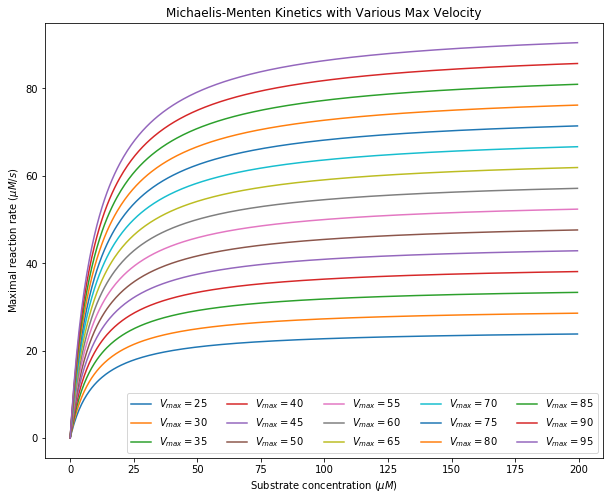

In [5]:
# Setting up the variables

x = np.arange(0, 200, 0.5)
K_list = np.arange(10, 100, 5)
V_list = np.arange(25, 100, 5)

y_vark = []
y_varv = []

plt.figure(0, figsize = (10.0, 8.0))
plt.title('Michaelis-Menten Kinetics with Various Max Velocity')
plt.xlabel('Substrate concentration ($\mu M$)')
plt.ylabel('Maximal reaction rate ($\mu M/s$)')

for v in V_list:
    tmp = michaelis_meten_kinetics_eq(v, x, 10)
    y_varv.append(tmp)
    plt.plot(x,tmp,label = "$V_{max} = $"+str(v))
plt.legend(ncol=5)

First the Michaelis-Menten reaction with various $V_{max}$ were examined.  From the figure above it can be seen that as the max rate velocity increases the the reaction max speed increases as well, but as $K_m$ is fixed, they all reach 50% max speed at the same concentration, which can be expected after examining the equations above.  

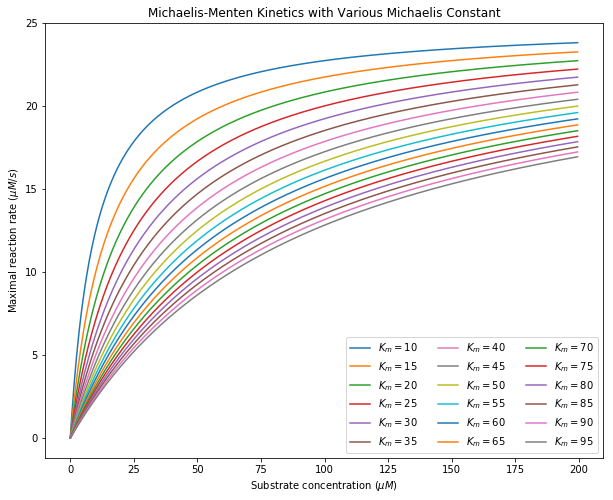

In [6]:
plt.figure(1, figsize = (10.0, 8.0))
plt.title('Michaelis-Menten Kinetics with Various Michaelis Constant')
plt.xlabel('Substrate concentration ($\mu M$)')
plt.ylabel('Maximal reaction rate ($\mu M/s$)')

for k in K_list:
    tmp = michaelis_meten_kinetics_eq(25, x, k)
    y_vark.append(tmp)
    plt.plot(x,tmp,label = "$K_{m} = $"+str(k))
plt.legend(ncol=3)

<span style="color:red"> Your plot is correct, but your maximum substrate concentration is not high enough to see reaction rate stabilize when for larger values of $K_{m}$. If you would've plotted to $S$ = 1000 (for example), estimating the $V_{max}$ would've been easier. Also, try interactive plots the next time :) </span>

In the second part of the experiment, $K_m$ was varied, and what can be observed from the figure above is that as $K_m$ is increased, the position where half the max velocity is increasing along the Substrate concentration axis.  This is as expected from the equations<span style="color:red">~~s~~</span> above, and it can be seen that it approaches the max speed much slower as $K_m$ is increased, even though the max velocity <span style="color:red">remains ~~reamins~~</span> constant.  

From looking at both of these figures it would be easier to approximate $V_{max}$ from the second figure from this experiment, but it would still be just an approximation and would not be of high enough accuracy to be reliably used. 

In [7]:
# Inhibition Kinetics
# Units:
# k_m is how efficient the enzyme/substrate affinity,  micro moles
# V_max is the speed at which the reaction goes, micro moles/s

def competitve_kinetics_eq(I, S, ki):
    V_max = 12
    k_m = 3
    V = []
    for s in S:
        V.append((V_max*s)/(s+(k_m*(1+(I/ki)))))
    return V

def non_competitve_kinetics_eq(I, S, ki):
    V_max = 12
    k_m = 3
    V = []
    for s in S:
        V.append((V_max*s)/((1+(I/ki))*(s+k_m)))
    return V
                 
def un_competitve_kinetics_eq(I, S, ki):
    V_max = 12
    k_m = 3
    V = []
    for s in S:
        V.append((V_max*s)/(s*(1+(I/ki))+k_m))
    return V

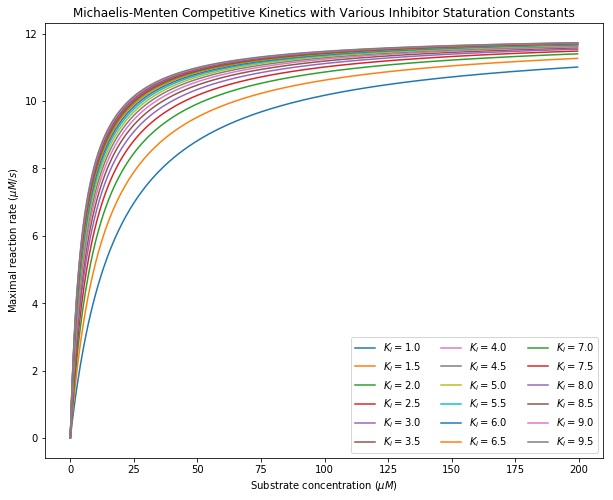

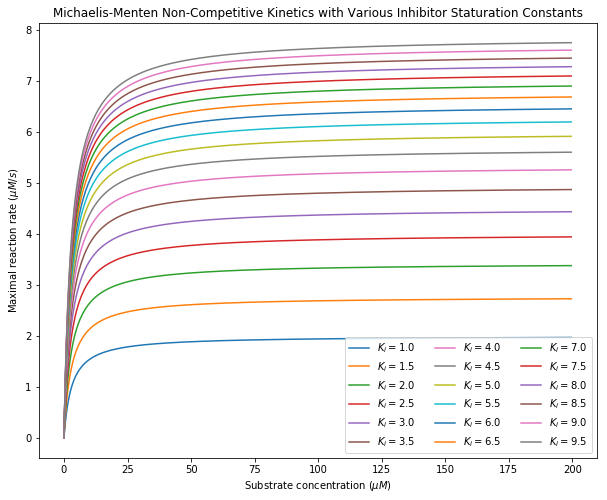

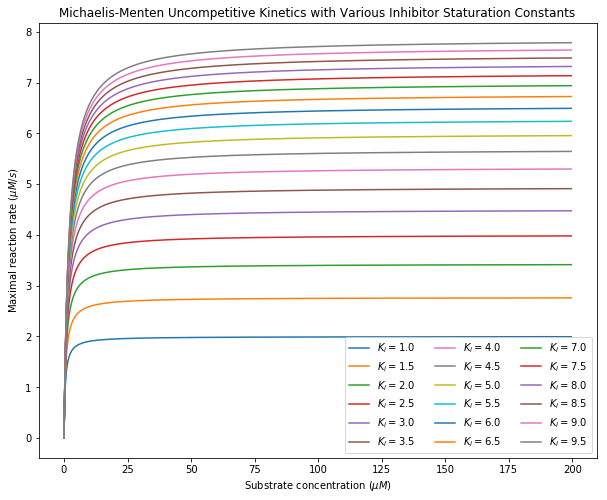

In [8]:
I_list = np.arange(2, 22, 2)
Ki_list = np.arange(1, 10, .5)

y_varI_c = []
y_vark_c = []

y_varI_nc = []
y_vark_nc = []

y_varI_uc = []
y_vark_uc = []

plt.figure(0, figsize = (10.0, 8.0))
plt.title('Michaelis-Menten Competitive Kinetics with Various Inhibitor Staturation Constants')
plt.xlabel('Substrate concentration ($\mu M$)')
plt.ylabel('Maximal reaction rate ($\mu M/s$)')

for k_i in Ki_list:
    tmp = competitve_kinetics_eq(5, x, k_i)
    y_varI_c.append(tmp)
    plt.plot(x,tmp,label = "$K_i = $"+str(k_i))
plt.legend(ncol=3)

plt.figure(1, figsize = (10.0, 8.0))
plt.title('Michaelis-Menten Non-Competitive Kinetics with Various Inhibitor Staturation Constants')
plt.xlabel('Substrate concentration ($\mu M$)')
plt.ylabel('Maximal reaction rate ($\mu M/s$)')

for k_i in Ki_list:
    tmp = non_competitve_kinetics_eq(5, x, k_i)
    y_varI_nc.append(tmp)
    plt.plot(x,tmp,label = "$K_i = $"+str(k_i))
plt.legend(ncol=3)

plt.figure(2, figsize = (10.0, 8.0))
plt.title('Michaelis-Menten Uncompetitive Kinetics with Various Inhibitor Staturation Constants')
plt.xlabel('Substrate concentration ($\mu M$)')
plt.ylabel('Maximal reaction rate ($\mu M/s$)')

for k_i in Ki_list:
    tmp = un_competitve_kinetics_eq(5, x, k_i)
    y_varI_uc.append(tmp)
    plt.plot(x,tmp,label = "$K_i = $"+str(k_i))
plt.legend(ncol=3)

In this part of the experiment the Michaelis-Menten inhibition reactions were examined with a varying $K_i$.  Starting with the competitive inhibition, it can be seen that as $K_i$ increased the $K_m$ value decreased.  This can be confirmed from the equations for $V_c$ when it is rewritten as follows:

$V_c=\frac{V_{\max }S}{K_{m}^{comp}+S}$

where 

$K_{m}^{comp}=K_{m}\left(1+\frac{I}{K_{i}}\right)$

from these equations it can be seen that as $K_i$ increases, $K_{m}^{comp}$ will decrease, meaning that the system will approach half the max velocity faster.

Next the noncompetitive inhibition reaction velocity was examined with various $K_i$.  From the figure above, it can be seen that as $K_i$. increases the maximum velocity of the system appears to increase.  This can be confirmed from the equations for $V_n$ when it is rewritten as follows:

$V_n=\frac{V_{\max }^{\operatorname{non}}S}{K_{m}+S}$

where 

$V_{\max }^{\operatorname{non}}=\frac{V_{\max }}{1+\frac{I}{K_{i}}}$

from these equations it can be seen that as $K_i$ increases, the $V_{max }^{non}$ increases, meaning that the max velocity will increase.

Finally the uncompetitive inhibition reaction velocity was examined with various $K_i$.  From the figure above, it can be seen that this is a combination of the two previous systems.  As $K_i$ increases, $V_{max}$ of the system appears to increase and the $K_m$ decreases.  This can be confirmed from the equations for $V_u$ when it is rewritten as follows:

$V_u=\frac{V_{\max }^{\operatorname{un}}S}{K_{m}^{un}+S}$

where 

$V_{\operatorname{max}}^{\mathrm{un}}=\frac{V_{\max}}{1+\frac{I}{K_{i}}}$

and 

$K_{\operatorname{m}}^{\mathrm{un}}=\frac{K_{m}}{1+\frac{I}{K_{i}}}$

from these equations it can be seen that as $K_i$ increases, the $V_{max}^{un}$ increases, meaning that the max velocity will increase and that $K_{m}^{comp}$ felt in the equation will decrease, meaning that the system will approach half the max velocity faster.

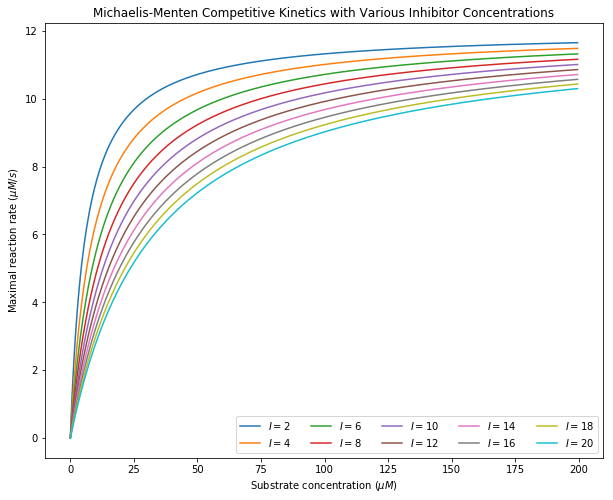

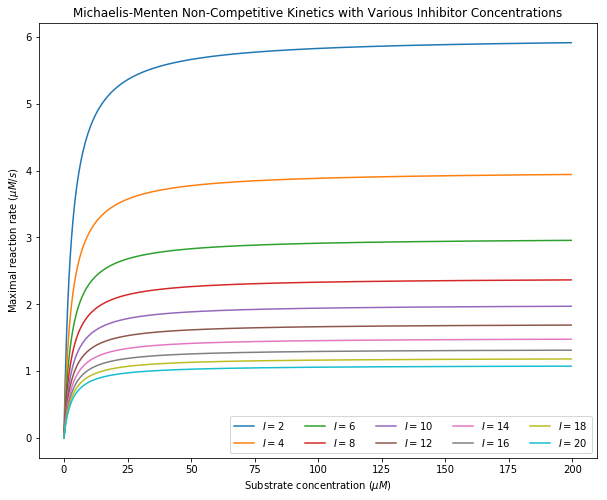

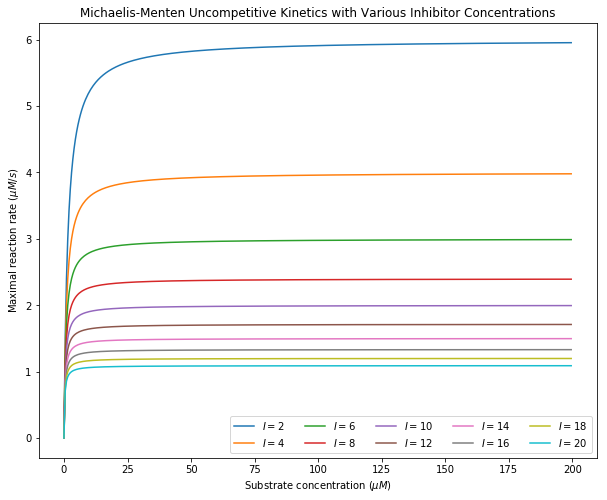

In [9]:
plt.figure(3, figsize = (10.0, 8.0))
plt.title('Michaelis-Menten Competitive Kinetics with Various Inhibitor Concentrations')
plt.xlabel('Substrate concentration ($\mu M$)')
plt.ylabel('Maximal reaction rate ($\mu M/s$)')

for i in I_list:
    tmp = competitve_kinetics_eq(i, x, 2)
    y_varI_c.append(tmp)
    plt.plot(x,tmp,label = "$I = $"+str(i))
plt.legend(ncol=5)

plt.figure(4, figsize = (10.0, 8.0))
plt.title('Michaelis-Menten Non-Competitive Kinetics with Various Inhibitor Concentrations')
plt.xlabel('Substrate concentration ($\mu M$)')
plt.ylabel('Maximal reaction rate ($\mu M/s$)')

for i in I_list:
    tmp = non_competitve_kinetics_eq(i, x, 2)
    y_varI_nc.append(tmp)
    plt.plot(x,tmp,label = "$I = $"+str(i))
plt.legend(ncol=5)

plt.figure(5, figsize = (10.0, 8.0))
plt.title('Michaelis-Menten Uncompetitive Kinetics with Various Inhibitor Concentrations')
plt.xlabel('Substrate concentration ($\mu M$)')
plt.ylabel('Maximal reaction rate ($\mu M/s$)')

for i in I_list:
    tmp = un_competitve_kinetics_eq(i, x, 2)
    y_varI_uc.append(tmp)
    plt.plot(x,tmp,label = "$I = $"+str(i))
plt.legend(ncol=5)

In this part of the experiment the Michaelis-Menten inhibition reactions were examined with a varied $I$.  Starting with the competitive reaction, it can be seen that as $I$ increases the $K_m$ value increases.  This can be confirmed from the equations seen where $K_i$ was varied.  From these equations it can be seen that as $I$ increases, $K_{m}^{comp}$ will increase, meaning that the system will approach half the max velocity more slowely.

Next the noncompetitive inhibition reaction velocity was examined with various $I$.  From the figure above, it can be seen that as $I$ increases the $V_{max}$ of the system appears to decrease.  This can be confirmed from the equations seen where $K_i$ was varied.  From these equations it can be seen that as $I$ increases, the $V_{max }^{non}$ decreases, meaning that the max velocity will decrease.

Finally the uncompetitive inhibition reaction velocity was examined with various concentrations of $I$.  From the figure above, it can be seen that this is a combination of the two previous systems.  As the concentration $I$ increases, the maximum velocity of the system appears to decrease and the substrate concentration where half the max velocity is reached increases.  This can be confirmed from the equations seen where $K_i$ was varied.  From these equations it can be seen that as $I$ increases, the $V_{max }^{un}$ decreases, meaning that the max velocity will decrease and that $K_{m}^{comp}$ felt in the equation will increase, meaning that the system will approach half the max velocity slower.

<span style="color:red"> Your plots and explanations were nice, but I needed a biological reason for the results as well.  </span>

__<span style="color:red"> 2a: max 5 pt: 5 <br>
    2b: max 5 pt: 4 <br>
2c: max 10 pt: 7 </span>__

# Exercise 2

In exercise 1 it was determined that trying to find the value of $V_{max}$ from the figures was difficult and possibly unreliable.  The Lineweaver-Burke plot, which is a plot of $1/V$ against $1/S$, which circumvents this problem, is now widely used to find the parameters for the enzyme kinetics equations (Michaelis-Menten parameters).

In this section, a general data list of substrate concentrations and the corresponding velocity of the reaction were given in a dataset.  These were plotted using a normal S vs. V plot and the Michaelis-Menten parameters were estimated.  Once this was done, the datasets were also plotted using the Lineweaver-Burke plot and the parameters were found again.  The error in the parameters found on the normal plot was evaluated compared to the Lineweaver-Burke plot.

Finally, multiple datasets were given with different concentrations of inhibitors ($I = 2, 5$ $\textbf{and}$ $ 8$), the type of inhibitor was determined and the Michaelis-Menten parameters were estimated.

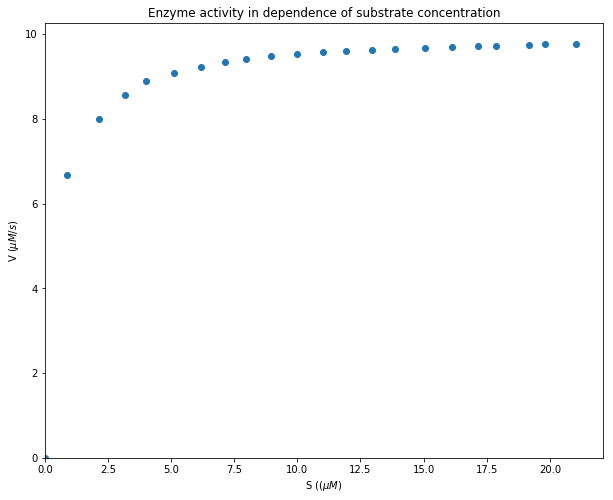

In [10]:

S = [0.0, 0.86, 2.16, 3.18, 4.02, 5.12, 6.19, 7.15, 7.98, 8.94, 10.0, 11.03, 11.94, 12.96, 13.87, 15.07, 16.14, 17.17, 17.88, 19.17, 19.81, 21.04]
V = [0.0, 6.666, 8., 8.571, 8.889, 9.091, 9.231, 9.333, 9.412, 9.474, 9.524, 9.565, 9.6, 9.63, 9.655, 9.678, 9.697, 9.714, 9.729, 9.743, 9.756, 9.767]

plt.figure(figsize = (10.0, 8.0))
plt.scatter(S, V)
plt.xlabel("S (($\mu M$)")
plt.ylabel("V ($\mu M /s$)")
plt.xlim(left = 0)
plt.ylim(bottom = 0)
plt.title("Enzyme activity in dependence of substrate concentration")
plt.show()


When examining the plot of reaction rate in dependence of substrate concentration, a clear Michaelis-Menten curve was observed. Extrapolating of the measured data points, the plateau of the curve, and therefore $V_{max}$ would be around 10 $\mu M/s$. The half-maximal rate would therefore be around 5 $\mu M/s$. Looking at the available data, this V would be reached at substrate concentrations of around 0.5 $\mu M$.

The parameters estimated based on the Michaelis-Menten curve would therefore be: $V_{max} \approx 10 \mu M/s$ and $K_m \approx 0.5 \mu M$.

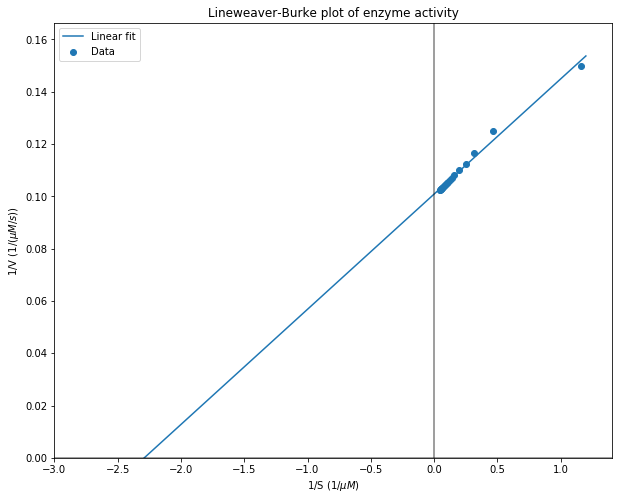

Kinetic parameters determined via linear fit to the data:
  V_max = 9.916773248612174
  K_m = 0.4367262422948778

Error between estimates on the Michaelis-Menten curve and the Lineweaver-Burke plot:
  V_max: 0.008322675138782643
  K_m: 0.12654751541024445


In [11]:
def make_Lineweaver_Burke(S, V):
    S_inv = [1/i for i in S if i > 0]
    V_inv = [1/i for i in V if i > 0]
    m,b = np.polyfit(S_inv, V_inv, 1)
    #print(m, b)
    return S_inv, V_inv, m, b
left = -3.0
right = 1.2
S_inv, V_inv, m, b = make_Lineweaver_Burke(S, V)    
fitted = [s*m+b for s in np.linspace(left, right, 10)]
plt.figure(figsize = (10.0, 8.0))
plt.scatter(S_inv, V_inv, label = "Data")
plt.plot(np.linspace(left, right, 10), fitted, label = "Linear fit")
plt.xlabel("1/S ($1/ \mu M$)")
plt.ylabel("1/V ($1/ (\mu M/s)$)")
plt.axvline(x=0, color='k', alpha = 0.5)
plt.axhline(y=0, color='k', alpha = 0.5)
plt.title("Lineweaver-Burke plot of enzyme activity")
plt.xlim(left = left)
plt.ylim(bottom = 0)
plt.legend(loc = "best")
plt.show()

#make_Lineweaver_Burke(S, V, -3, 1.2)
print("Kinetic parameters determined via linear fit to the data:\n  V_max = " + str(1/b) + "\n  K_m = " + str(m/b))
print("\nError between estimates on the Michaelis-Menten curve and the Lineweaver-Burke plot:\n  V_max: " + str(abs((10-(1/b))/10)) + "\n  K_m: " + str(abs((0.5-(m/b))/0.5)))

<span style="color:red"> We really need to see the intersection with the y-axis, so plot values under the y-axis as well! (-1) 

Taking the inverse of both substrate concentrations and reaction rates, a Lineweaver-Burke plot was produced. By applying a linear fit of the formula $1/V = m 1/S + b$ to the data points, the kinetic parameters were estimated using the following formulas: $v_{max} = 1/b$ and $K_m = m/b$. 

The estimated parameters were:
$v_{max} \approx 9.92 \mu M/s$ and $K_m \approx 0.44 \mu M$.

Overall, the Lineweaver-Burke plot seems more reliable for the estimation of the kinetic parameters, than the non-inverted representation. While it was possible to make a reasonable estimate of $v_{max}$ for the Michaelis-Menten curve (error $<$ 1%, determining the $K_m$ value accurately proved to be considerably harder. The $K_m$ estimations deviated by more than 12% between the two graphs. This is mot likely due to the fact, that the $K_m$ value lies in an area of steep growth, making it hard to estimate exactly how the curve would look in this region, and where exactly the half-maximal rate would be reached.

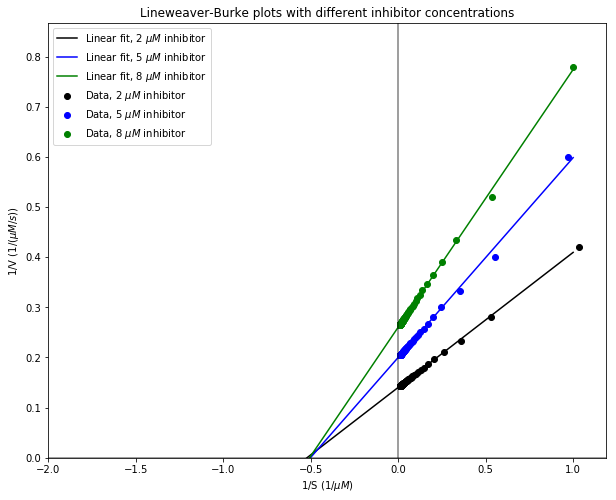

Kinetic parameters determined via linear fit to the data:
  2 µM Inhibitor
    V_max = 7.129784425215029
    K_m = 1.9199572511376846
  5 µM Inhibitor
    V_max = 5.002288158043902
    K_m = 1.9934814814019766
  8 µM Inhibitor
    V_max = 3.8434338717555354
    K_m = 1.975405498452522


In [12]:
S_2 = [0.0, 0.97, 1.88, 2.8, 3.85, 4.91, 5.85, 6.82, 7.8, 8.86, 10.02, 10.95, 12.19, 13.01, 14.01, 15.15, 16.16, 16.92, 18.12, 18.82, 19.97, 21.03, 22.01, 22.91, 23.91, 24.96, 26.13, 27.2, 28.06, 28.98, 30.04, 30.97, 32.17, 33.14, 34.12, 34.82, 35.89, 37.04, 38.14, 38.84, 39.88, 40.99, 42.09, 42.99, 44.14, 45.13, 45.84, 46.81, 48.07, 49.1, 49.88, 51.15, 52.18, 52.89, 53.92, 55.11, 56.08, 57.06, 58.14, 59.13, 59.89, 60.92, 62.08, 62.83, 64.15, 65.0, 66.05, 66.86, 67.91, 69.01, 70.12, 70.96, 71.83, 73.08, 73.97, 75.01, 75.96, 77.08, 78.0, 79.09, 80.05, 80.86, 82.18, 82.84, 83.99, 84.85, 85.92, 86.88, 87.95, 88.96, 90.11, 91.07, 92.09, 93.15, 94.19, 94.91, 96.02, 97.13, 98.02, 99.09, 99.95]
V_2 = [0.0, 2.381, 3.571, 4.286, 4.762, 5.102, 5.357, 5.556, 5.714, 5.844, 5.952, 6.044, 6.123, 6.19, 6.25, 6.303, 6.349, 6.391, 6.429, 6.463, 6.494, 6.522, 6.548, 6.571, 6.593, 6.614, 6.633, 6.65, 6.667, 6.682, 6.697, 6.71, 6.723, 6.735, 6.746, 6.757, 6.767, 6.777, 6.786, 6.794, 6.803, 6.811, 6.818, 6.826, 6.832, 6.839, 6.845, 6.851, 6.857, 6.863, 6.868, 6.873, 6.878, 6.883, 6.888, 6.892, 6.897, 6.901, 6.905, 6.909, 6.912, 6.916, 6.92, 6.923, 6.927, 6.93, 6.933, 6.936, 6.939, 6.942, 6.944, 6.947, 6.95, 6.952, 6.955, 6.957, 6.96, 6.962, 6.964, 6.967, 6.968, 6.971, 6.973, 6.975, 6.977, 6.979, 6.98, 6.983, 6.984, 6.986, 6.988, 6.989, 6.991, 6.993, 6.994, 6.996, 6.997, 6.998, 7., 7.001, 7.003]
S_5 = [0.0, 1.03, 1.81, 2.83, 4.08, 5.06, 5.87, 6.89, 8.16, 8.97, 9.92, 10.82, 11.95, 13.01, 14.16, 15.1, 15.88, 17.01, 17.94, 19.2, 20.08, 20.99, 22.11, 22.93, 24.04, 24.84, 25.98, 26.81, 28.02, 28.82, 30.1, 30.87, 32.1, 33.19, 34.08, 34.97, 36.16, 37.16, 37.86, 38.85, 39.89, 40.94, 42.08, 43.01, 43.81, 44.82, 46.13, 47.02, 47.92, 49.13, 50.15, 51.04, 51.91, 52.85, 54.17, 55.02, 55.95, 56.83, 58.01, 59.02, 59.94, 61.19, 62.16, 63.09, 64.15, 65.01, 65.82, 66.86, 67.99, 68.91, 69.98, 71.12, 72.13, 72.94, 74.08, 74.92, 75.94, 76.93, 77.99, 79.06, 80.02, 81.13, 81.97, 82.88, 83.89, 84.84, 85.97, 86.94, 88.0, 89.09, 89.92, 90.99, 91.82, 92.91, 94.07, 94.94, 95.92, 97.0, 97.82, 99.13, 99.93]
V_5 = [0.0, 1.667, 2.5, 3., 3.333, 3.572, 3.75, 3.889, 4., 4.091, 4.167, 4.231, 4.286, 4.333, 4.375, 4.412, 4.444, 4.474, 4.5, 4.524, 4.546, 4.565, 4.583, 4.6, 4.615, 4.629, 4.643, 4.655, 4.667, 4.677, 4.687, 4.697, 4.706, 4.714, 4.722, 4.73, 4.737, 4.744, 4.75, 4.756, 4.762, 4.767, 4.773, 4.778, 4.783, 4.787, 4.792, 4.796, 4.8, 4.804, 4.808, 4.811, 4.815, 4.818, 4.821, 4.825, 4.828, 4.83, 4.833, 4.836, 4.839, 4.841, 4.844, 4.846, 4.848, 4.851, 4.853, 4.855, 4.857, 4.859, 4.861, 4.863, 4.865, 4.867, 4.869, 4.87, 4.872, 4.874, 4.875, 4.876, 4.878, 4.88, 4.881, 4.882, 4.884, 4.885, 4.886, 4.888, 4.889, 4.89, 4.891, 4.893, 4.894, 4.895, 4.896, 4.897, 4.898, 4.899, 4.9, 4.901, 4.902]
S_8 = [0, 1., 1.86, 3.05, 4., 4.99, 6.01, 7.19, 8.14, 9.06, 10., 11.15, 11.82, 12.98, 14.17, 15.16, 15.86, 17.03, 18.08, 18.99, 19.83, 21.1, 22.18, 23.19, 23.83, 25.17, 25.96, 27.05, 28.02, 28.92, 29.86, 30.98, 32.07, 32.95, 33.84, 34.89, 35.85, 37.17, 38.17, 39.06, 39.93, 41.11, 42.06, 42.91, 43.99, 44.92, 45.84, 46.91, 47.85, 49.05, 49.98, 50.9, 51.84, 52.85, 54.09, 55., 55.87, 56.82, 57.91, 59.04, 60.09, 61.18, 62.18, 62.95, 63.96, 64.93, 66.11, 67., 68.18, 68.9, 70.06, 70.86, 72.03, 73.16, 73.91, 75.06, 76.15, 77.08, 77.83, 79.04, 79.98, 81.15, 82., 82.98, 84.03, 84.92, 85.97, 87., 88.17, 89.2, 90.02, 90.87, 92.18, 92.81, 94.2, 95.12, 95.83, 97.04, 97.91, 99.1, 99.87]
V_8 = [0, 1.282, 1.923, 2.308, 2.564, 2.747, 2.885, 2.992, 3.077, 3.147, 3.205, 3.255, 3.297, 3.333, 3.365, 3.394, 3.419, 3.441, 3.462, 3.48, 3.497, 3.512, 3.526, 3.538, 3.55, 3.561, 3.572, 3.581, 3.59, 3.598, 3.606, 3.613, 3.62, 3.626, 3.633, 3.638, 3.644, 3.649, 3.654, 3.658, 3.663, 3.667, 3.671, 3.675, 3.679, 3.683, 3.686, 3.689, 3.692, 3.696, 3.698, 3.701, 3.704, 3.706, 3.709, 3.711, 3.713, 3.716, 3.718, 3.72, 3.722, 3.724, 3.726, 3.728, 3.73, 3.731, 3.733, 3.735, 3.736, 3.738, 3.739, 3.741, 3.742, 3.744, 3.745, 3.746, 3.747, 3.749, 3.75, 3.751, 3.752, 3.753, 3.755, 3.756, 3.757, 3.758, 3.759, 3.76, 3.761, 3.762, 3.763, 3.763, 3.764, 3.765, 3.766, 3.767, 3.768, 3.768, 3.769, 3.77, 3.771]
left = -2
right = 1
S_2_inv, V_2_inv, m_2, b_2 = make_Lineweaver_Burke(S_2, V_2)
S_5_inv, V_5_inv, m_5, b_5 = make_Lineweaver_Burke(S_5, V_5)
S_8_inv, V_8_inv, m_8, b_8 = make_Lineweaver_Burke(S_8, V_8)
fitted_2 = [s*m_2+b_2 for s in np.linspace(left, right, 10)]
fitted_5 = [s*m_5+b_5 for s in np.linspace(left, right, 10)]
fitted_8 = [s*m_8+b_8 for s in np.linspace(left, right, 10)]
plt.figure(figsize = (10.0, 8.0))
plt.scatter(S_2_inv, V_2_inv, color = "k", label = "Data, 2 $\mu M$ inhibitor")
plt.plot(np.linspace(left, right, 10), fitted_2, color = "k", label = "Linear fit, 2 $\mu M$ inhibitor")
plt.scatter(S_5_inv, V_5_inv, color = "b", label = "Data, 5 $\mu M$ inhibitor")
plt.plot(np.linspace(left, right, 10), fitted_5, color = "b", label = "Linear fit, 5 $\mu M$ inhibitor")
plt.scatter(S_8_inv, V_8_inv, color = "g", label = "Data, 8 $\mu M$ inhibitor")
plt.plot(np.linspace(left, right, 10), fitted_8, color = "g", label = "Linear fit, 8 $\mu M$ inhibitor")
plt.xlabel("1/S ($1/ \mu M$)")
plt.ylabel("1/V ($1/ (\mu M/s)$)")
plt.axvline(x=0, color='k', alpha = 0.5)
plt.axhline(y=0, color='k', alpha = 0.5)
plt.title("Lineweaver-Burke plots with different inhibitor concentrations")
plt.xlim(left = left)
plt.ylim(bottom = 0)
plt.legend(loc = "best")
plt.show()
print("Kinetic parameters determined via linear fit to the data:\n  2 µM Inhibitor\n    V_max = " + str(1/b_2) + "\n    K_m = " + str(m_2/b_2) + "\n  5 µM Inhibitor\n    V_max = " + str(1/b_5) + "\n    K_m = " + str(m_5/b_5) + "\n  8 µM Inhibitor\n    V_max = " + str(1/b_8) + "\n    K_m = " + str(m_8/b_8))

<span style="color:red"> Same as above (-1)

Lineweaver-Burke plots were produced for enzyme activity at three different inhibitor concentrations. Linear graphs were fit to the data and the corresponding kinetic parameters determined.
The $K_m$ values showed only marginal differences for the different inhibitor concentrations. The $K_m$ values ranged from 1.92 to 1.99. The $v_{max}$ values, however, showed great variation at different inhibitor concentrations. At 2 $\mu M$ the $V_{max}$ was at 7.13 $\mu M/S$ while it was only 3.84 $\mu M/s$ at inhibitor concentrations of 8 $\mu M$.

From the material presented on the Lineweaver-Burk plots, it would appear that these are noncompetitive inhibition.  This can be seen from comparing the slopes and the y intercepts.  As the slope has changed and the y intercept has changed in each, this would indicate a noncompetitive inhibition system.  This can also be confirmed from the values of $K_m$ and $V_{max}$.  as this is a noncompetitive inhibition system, the $K_m$ should be unaffected, which it mostly is, staying at approximately 1.9, and that the $V_{max}$ will be reduced, which can be seen.

<span style="color:red"> Again, I would've liked a more biological explanation (-2). </span>

__<span style="color:red"> 3a: max 5 pt: 5 <br> 
        3b: max 15 pt: 10 <br>
                3c: max 10 pt: 5 </span>__

# Exercise 3

In part 3 of this work, ionic channels in cellular membrane and their transition between different states were modeled.  In the experiment, it was assumed that they could exist in 3 states: $S_1, S_2, S_3$ where $S_1 \text{and} S_3$ represented a closed state on either side of the membrane, preventing ion passage, and $S_2$ represented an open state.  There are a number of these channels on a given cell and the fraction of chanenls in states $S_1, S_2, S_3$ are represented by the terms $x,y,z$, respectively.  The transitions are shown in the following schematic:

$\mathbf{S}_{1} \rightleftharpoons^{\mathbf{k}_{1}}{{\mathbf{k}}_{3}} \mathbf{S}_{2} {\rightarrow}^{k_{2}} \mathbf{S}_{3}$

where $k_1$, $k_2$, and $k_3$ are rate constants $\geq 0$.  The differential equations for the system are given as:

$\frac{dx}{dt} = -k_1 x + k_3 y\\
\frac{dy}{dt} = k_1 x - (k_2 + k_3) y\\
\frac{dz}{dt} = k_2 y$

Using these differential equations and making the assumption that $k_1 = 2$, $k_2 = 2$, and $k_3 = 1$, the system was modeled in a vector plot.

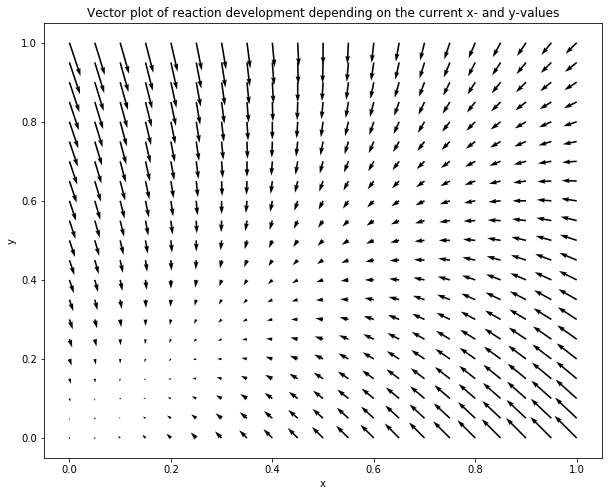

In [13]:
k1 = 2
k2 = 2
k3 = 1
def flowfield(k1, k2, k3, steps):
    xList = []
    yList = []
    x_compList = []
    y_compList = []
    for i in range(steps):
        for j in range(steps):
            x = float(i)/(steps-1)
            y = float(j)/(steps-1)
            xList.append(x)
            yList.append(y)
            x_compList.append(-k1 * x + k3 * y)
            y_compList.append( k1 * x - (k2+k3) * y)
    plt.figure(figsize = (10.0, 8.0))
    plt.quiver(xList, yList, x_compList, y_compList)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("Vector plot of reaction development depending on the current x- and y-values")
    plt.show()
flowfield(k1, k2, k3, 21)


Based of the reaction parameters $k_1 = 2$, $k_2 = 2$ and $k_3 = 1$ a vector plot was produced that indicates the flow in x- and y-direction based of the current values for x- and y-values. When inspecting the flow field, it becomes apparent that flow occurs at almost all points. The only point that does not seem to experience any flow is at (0,0). At this point, however, no channel is in state x or y, and since these only depend on x and y themselves but not on z, no change can occur. At the other points of the vector field a pull in the approximate direction of (0, 0) can be observed. While there is a pull towards higher x-values at high y- and low x-values and a pull towards higher y-values at high x-values and low y-values, it appears as if, independent of the starting point, all states would develop towards (0,0) eventually.

<span style="color:red"> Again, explain what it means biologically (-1)

Next the equations were solved, and plotted to show x, y and z as a function of time starting from different initial conditions: $(x = 1, y = 0, z = 0)$ and $(x = 0, y = 1, z = 0)$.  The systems were then examined and conclusions about the system dynamics were drawn.

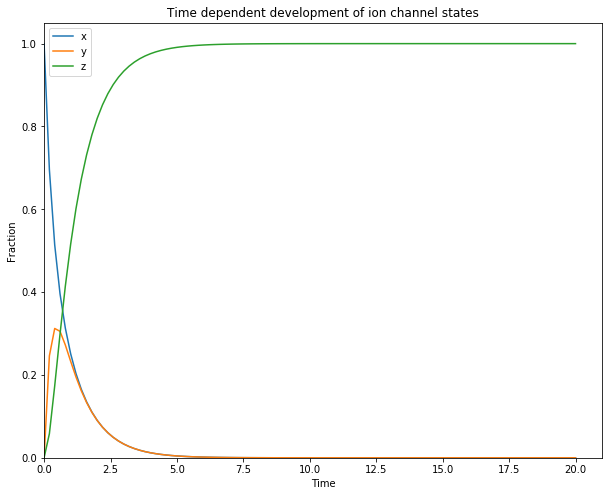

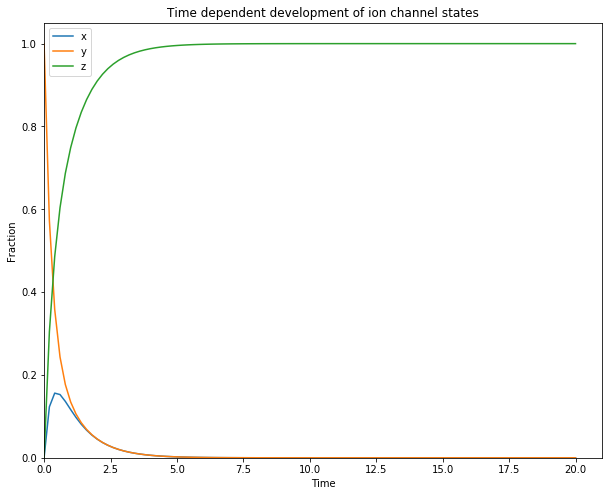

(2, 2, 1, 2.6378993263940835e-10, -1.3473419146031964e-11, 0.9999999997496823)

In [14]:
def plot_progression(start, end, steps, k1, k2, k3, x0, y0, z0):
    timepoints = np.linspace(start, end, steps)
    #print(timepoints)
    def ddt(xyz, t0):
        x,y,z = xyz
        dx = -k1 * x + k3 * y
        dy = k1 * x - (k2+k3) * y
        dz = k2 * y
        return dx, dy, dz
    ode_res = odeint(ddt, (x0, y0, z0),timepoints)
    ode_x = [i[0] for i in ode_res]
    ode_y = [i[1] for i in ode_res]
    ode_z = [i[2] for i in ode_res]
    #print(odeint(ddt, (1,0,0),timepoints))
    plt.figure(figsize = (10.0, 8.0))
    plt.plot(timepoints, ode_x, label = "x")
    plt.plot(timepoints, ode_y, label = "y")
    plt.plot(timepoints, ode_z, label = "z")
    plt.xlabel("Time")
    plt.ylabel("Fraction")
    plt.legend()
    plt.xlim(left = 0)
    plt.ylim(bottom = 0)
    plt.title("Time dependent development of ion channel states")
    plt.show()
    return k1, k2, k3, ode_x[-1], ode_y[-1], ode_z[-1]
plot_progression(0, 20, 101, 2, 2, 1, 1, 0, 0)
plot_progression(0, 20, 101, 2, 2, 1, 0, 1, 0)

In the plot starting with x = 1, a sharp decrease of x occurred immediately, that leveled out as x approached 0. y increased initially, but started decreasing relatively early. z, however, grew sharply in the beginning, and more slowly as time progressed. Over time both x and y approached 0 while z grew closer to 1.
For the plot starting at x = 0, y = 1, z = 0, a similar trend occurred. Here however the roles of x and y where inversed. Nonetheless, eventually both x and y approached 0, and z approached 1.
This makes intuitive sense, since with $k_2$ value above 0, z can only increase. x and y on the other hand can also decrease. For x this occurs by the ion channels changing the state to y (dependent on $k_1$), and for y this can be caused by changes from y to either x or z (dependent on $k_3$ and $k_2$, respectively). Therefore, as long as $k_2$ is above zero eventually all y will be converted into z. If additionally, $k_1$ is positive, both x and y will approach 0, while z approaches 1.

<span style="color:red"> I gave you half the points for your explanation, as we needed a biological explanation as well! 

Next, given the initial conditions $(x = 1, y = 0, z = 0)$ and assuming that $k_1 = 0$, $k_2 = 2$ and $k_3 = 1$, x, y and z were solved as a function of time and the system was analyzed.

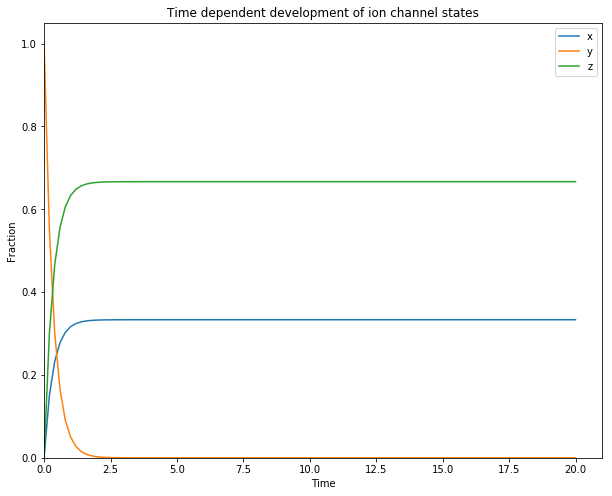

(0, 2, 1, 0.3333333333354284, -6.284561135742844e-12, 0.6666666666708568)


In [15]:
print(plot_progression(0, 20, 101, 0, 2, 1, 0, 1, 0))

Similar to the results in the previous experiment y grew increasingly closer to 0. Here however, the x value did not drop to zero as well, but approached a value of approximately 0.33. At the same time, the z value did not reach 1, but <span style="color:red">plateaued</span> around 0.66. The fact that y reaches 0 makes intuitive sense, since there is no conversion from either x or z to y, so ion channels continuously leave this state but are never reverted to it. Since $k_1$ is 0, no conversion from x occurs, therefore it can only increase. The same holds for z, leading both of these state to increase until y has reached 0 and can not supply them with additional state changes to x or z. The split of x = 1/3  and z = 2/3, coincides with the parameters $k_2 = 2$ and $k_3 = 1$. As long as y is present in the system, two thirds of the ion channels changing the state will become z while one third transforms to x. This yield the final distribution after y reaches 0.

Finally, assuming that $k_1 = 0$, $k_2$ and $k_3$ are arbitrary positive numbers, x and z were calculated in terms of $k_2$ and $k_3$.

In [16]:
%matplotlib inline
plot_interact = interactive(plot_progression, start=fixed(0), end=fixed(20), steps=fixed(101), k1=fixed(0), k2=(0,5,0.1), k3=(0,5,0.1), x0=fixed(0), y0=fixed(1), z0=fixed(0))
display(plot_interact)

aW50ZXJhY3RpdmUoY2hpbGRyZW49KEZsb2F0U2xpZGVyKHZhbHVlPTIuMCwgZGVzY3JpcHRpb249dSdrMicsIG1heD01LjApLCBGbG9hdFNsaWRlcih2YWx1ZT0yLjAsIGRlc2NyaXB0aW9uPXXigKY=


TypeError: 'module' object is not callable

<span style="color:red"> I got the following error trying to run the interactive plot: 'TypeError: 'module' object is not callable'. As your explanation is good, I still gave you 2 points. (If the interactive plot does work on your computer, let me know!) </span>

In [ ]:
%matplotlib notebook
t, k2, k3 = symbols('t, k2, k3')
x = symbols('x', cls=Function)
y = symbols('y', cls=Function)
z = symbols('z', cls=Function)
diffeq = Eq(x(t).diff(t), k3 * y(t)), Eq(y(t).diff(t), -(k2+k3) * y(t)), Eq(z(t).diff(t), k2 * y(t))
dsolve(diffeq, ics = {x(0): 0, y(0): 1, z(0): 0})

When using the dsolve function of the scypy package in Python2 results in the following formulas:

$x(t) = C_1 + C_2 t + C_3k_3 e^{\frac{t(-k_2-k_3)}{k_2}}\\
y(t) = -C_3(k_2+k_3) e^{\frac{t(-k_2-k_3)}{k_2}}\\
z(t) = C_2 + C_3 e^{t (-k_2 - k_3)}$

However, this is incorrect. The incorrect solving of the system of equations indicates some flaw in the dsolve function. This function should therefore only used with caution. Since this option failed, mathematica was used to solve the equations using the following setup:

DSolve\[\{x'[t] == k3 * y[t], y'[t] == -(k2+k3)*y[t], z'[t] == k2*y[t], x[0] == 0, y[0] == 0, z[0] == 0, {x[t],y[t],z[t],t}\}\]

gave the following equations for the 

$x[t] \rightarrow-\frac{\left(-1+e^{(-k 2-k 3) t}\right) k 3}{k 2+k 3}$

$y[t] \rightarrow e^{(-k 2-k 3) t}$

$z[t] \rightarrow-\frac{\left(-1+e^{(-k 2-k 3) t}\right) k 2}{k 2+k 3}$

which gives the values of x and z in terms of $k_2$ and $k_3$.

<span style="color:red"> Why is Y[t] still in your answer from Mathematica? You used Y[0] = 0, does this explain your answer? As you did use the right way of solving the equation in python (but your answer is wrong because of Sympy), I gave you 3 points. </span>

### <span style="color:red"> __General gemarks__ </span>
<span style="color:red"> Nice report! It was easy to read and the plots looked good. I was missing biological explanations for the results, you lost the most points for that. Unfortunately the interactive plot did not work in the last assignment, and you made a mistake in the Mathematica-answer. Also think about the best way of showing your results, interactive plots are much nicer for a question like the first one. I saw some spelling mistakes, think about that as well! If you think about the biological meaning next time, your grade will probably be much higher! </span>

## Grade: 1 + points * 0.09 : 7.9
- Answers: 59
- Structure: 5
- Textual: 4 (-1 for the spelling errors)
- Methods: 4 (-1 for not using interactive plots)
- Tables and figures: 5